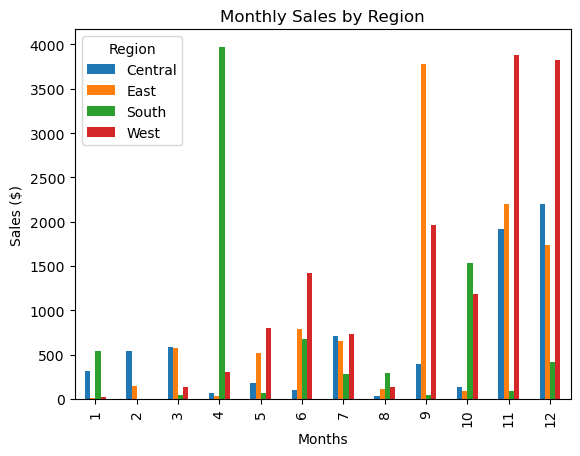

In [39]:
# Task 3 Dashboard
#1 Graph

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', "Task 1 (Random Sample)")

df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Month'] = df['Order Date'].dt.month

sales_by_month_and_region = df.groupby(['Month', 'Region'])['Sales'].sum()

sales_by_month_and_region = sales_by_month_and_region.reset_index().pivot(index='Month', columns='Region', values='Sales')

sales_by_month_and_region.plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Sales ($)')
plt.title('Monthly Sales by Region')
plt.legend(title='Region', loc='upper left')
plt.show()

In [34]:
#1 Pivot Table

import pandas as pd

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')

df['Month'] = pd.to_datetime(df['Order Date']).dt.month

table = pd.pivot_table(df, values='Sales', index=['Month'], columns=['Region'], aggfunc='sum', fill_value=0)

table = table.reindex(index=range(1,13))

table = table.round(2)

print("Monthly Sales by Region ($)")
print(table)

Monthly Sales by Region ($)
Region  Central     East    South     West
Month                                     
1        310.15    15.17   545.94    24.85
2        543.54   151.04     0.00     0.00
3        585.98   577.84    42.68   140.26
4         71.12    31.10  3971.33   304.19
5        176.48   522.36    66.68   803.09
6         99.74   783.98   675.12  1416.94
7        705.21   655.20   287.36   730.80
8         36.88   117.14   298.50   129.75
9        391.99  3776.25    47.56  1964.40
10       131.86    93.04  1538.25  1186.93
11      1922.65  2200.40    92.85  3876.79
12      2203.08  1735.86   417.56  3820.21


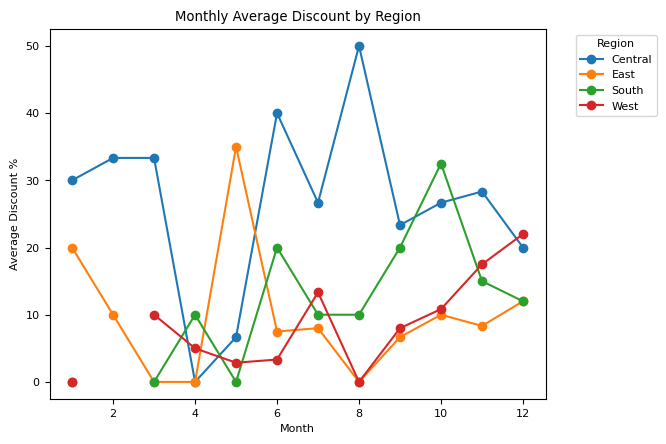

In [19]:
#2 Graph

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Discount'] = df['Discount'].fillna(0) * 100

monthly_avg_discount = df.groupby(['Month', 'Region'])['Discount'].mean().unstack()

monthly_avg_discount = monthly_avg_discount.reindex(range(1, 13))

plt.rcParams.update({'font.size': 8})
monthly_avg_discount.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Discount %')
plt.title('Monthly Average Discount by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [38]:
#2 Pivot Table

import pandas as pd

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')

df['Month'] = pd.to_datetime(df['Order Date']).dt.month

table = pd.pivot_table(df, values='Discount', index=['Month'], columns=['Region'], aggfunc='mean', fill_value=0)

table = table.reindex(index=range(1,13))

table = (table * 100).round(1)
print("Monthly Average Discount by Region (%)")
print(table)

Monthly Average Discount by Region (%)
Region  Central  East  South  West
Month                             
1          30.0  20.0    0.0   0.0
2          33.3  10.0    0.0   0.0
3          33.3   0.0    0.0  10.0
4           0.0   0.0   10.0   5.0
5           6.7  35.0    0.0   2.9
6          40.0   7.5   20.0   3.3
7          26.7   8.0   10.0  13.3
8          50.0   0.0   10.0   0.0
9          23.3   6.7   20.0   8.0
10         26.7  10.0   32.5  10.8
11         28.3   8.3   15.0  17.5
12         20.0  12.0   12.0  22.0


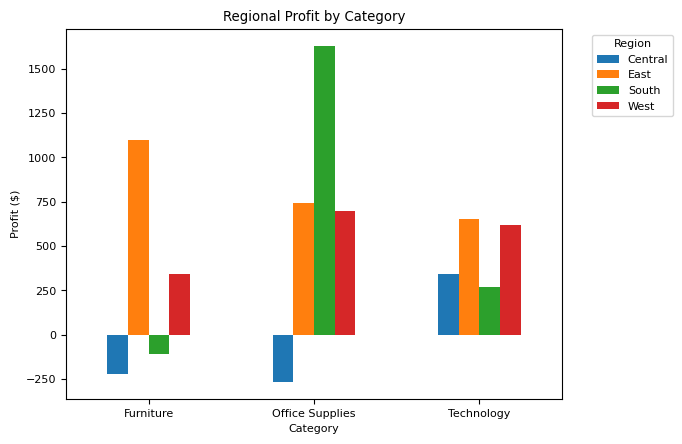

In [26]:
#3 Graph

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')
category_profit_region = df.pivot_table(values='Profit', index='Category', columns='Region', aggfunc='sum')
category_profit_region.plot(kind='bar', rot=0)
plt.xlabel('Category')
plt.ylabel('Profit ($)')
plt.title('Regional Profit by Category')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [36]:
#3 Pivot Table


import pandas as pd

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')

table = pd.pivot_table(df, values='Profit', index=['Region', 'Category'], columns=[], aggfunc='sum')

table = table.unstack(level=0)
table = table.round(2)

print("Regional Profit by Category ($)")
print(table)

Regional Profit by Category ($)
                 Profit                          
Region          Central     East    South    West
Category                                         
Furniture       -219.22  1099.28  -107.82  342.70
Office Supplies -265.27   744.54  1627.84  697.48
Technology       342.82   654.09   270.77  617.76


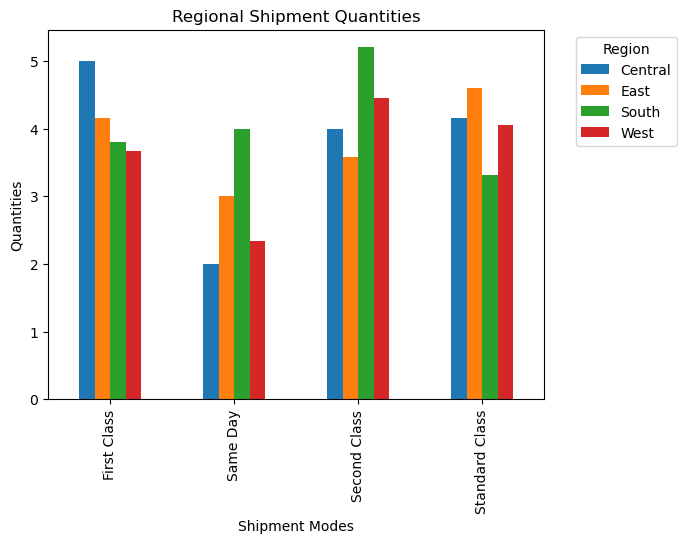

In [40]:
#4 Graph

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')

monthly_shipment_quantities = df.groupby(['Ship Mode', 'Region'])['Quantity'].mean().unstack()

plt.rcParams.update({'font.size': 10})
monthly_shipment_quantities.plot(kind='bar')
plt.xlabel('Shipment Modes')
plt.ylabel('Quantities')
plt.title('Regional Shipment Quantities')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [43]:
#4 Pivot Table

import pandas as pd

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')

table = pd.pivot_table(df, values='Quantity', index=['Region', 'Ship Mode'], columns=[], aggfunc='sum')

table = table.unstack(level=0)
table = table.round(2)

print("Regional Shipment Quantities")
print(table)


Regional Shipment Quantities
               Quantity                
Region          Central East South West
Ship Mode                              
First Class          10   54    19   66
Same Day              4    6     4    7
Second Class         36   43    52   40
Standard Class      154  124    53  138


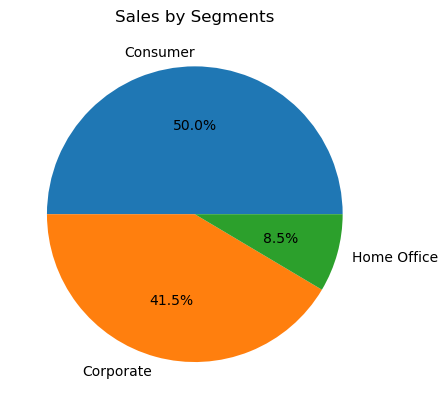

In [44]:
#5 Graph

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')

segment_sales = df.groupby('Segment')['Sales'].sum()

plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%')
plt.title('Sales by Segments')
plt.show()

In [47]:
#5 Pivot Table

import pandas as pd

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')

table = pd.pivot_table(df, values='Sales', index=['Segment'], aggfunc='sum')

table = table.round(2)

print("Sales by Segments ($)")
print(table)

Sales by Segments ($)
                Sales
Segment              
Consumer     20110.58
Corporate    16677.86
Home Office   3431.68
